# WeatherAll

In [1]:
from __future__ import division
import os
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date

## Data Preprocessing

In [58]:
frames=[]
for csv in [i for i in os.listdir("data/") if i.endswith(".csv")]:
    temp = pd.read_csv(os.path.join("data",csv))
    frames.append(temp)
data_weather = pd.concat(frames)
data_weather.head()

,Year,m,d,Time,Time zone,Cloud amount (1/8),Pressure (msl) (hPa),Relative humidity (%),Precipitation intensity (mm/h),Snow depth (cm),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Gust speed (m/s),Wind speed (m/s)
0,2018,5,1,00:00,UTC,8.0,1011.1,77.0,NaN,NaN,7.4,3.6,50000.0,64.0,5.9,2.3
1,2018,5,1,00:10,UTC,8.0,1010.7,77.0,NaN,NaN,7.4,3.6,50000.0,75.0,4.6,2.7
2,2018,5,1,00:20,UTC,8.0,1010.5,76.0,NaN,NaN,7.5,3.6,50000.0,63.0,4.8,2.8
3,2018,5,1,00:30,UTC,8.0,1010.2,76.0,NaN,NaN,7.5,3.6,48833.0,64.0,5.9,3.2
4,2018,5,1,00:40,UTC,8.0,1010.4,75.0,NaN,NaN,7.6,3.5,46357.0,70.0,5.6,2.8


In [59]:
data_weather['date_time'] = data_weather.apply(lambda row: "%s-%s-%s %s"%(row['Year'], row['m'], row['d'], row['Time']), axis=1)
data_weather['date_time'] =  pd.to_datetime(data_weather['date_time'], format='%Y-%m-%d %H:%M',errors='coerce')
data_weather.head()

,Year,m,d,Time,Time zone,Cloud amount (1/8),Pressure (msl) (hPa),Relative humidity (%),Precipitation intensity (mm/h),Snow depth (cm),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Gust speed (m/s),Wind speed (m/s),date_time
0,2018,5,1,00:00,UTC,8.0,1011.1,77.0,NaN,NaN,7.4,3.6,50000.0,64.0,5.9,2.3,2018-05-01 00:00:00
1,2018,5,1,00:10,UTC,8.0,1010.7,77.0,NaN,NaN,7.4,3.6,50000.0,75.0,4.6,2.7,2018-05-01 00:10:00
2,2018,5,1,00:20,UTC,8.0,1010.5,76.0,NaN,NaN,7.5,3.6,50000.0,63.0,4.8,2.8,2018-05-01 00:20:00
3,2018,5,1,00:30,UTC,8.0,1010.2,76.0,NaN,NaN,7.5,3.6,48833.0,64.0,5.9,3.2,2018-05-01 00:30:00
4,2018,5,1,00:40,UTC,8.0,1010.4,75.0,NaN,NaN,7.6,3.5,46357.0,70.0,5.6,2.8,2018-05-01 00:40:00


In [6]:
!wget https://dev.hsl.fi/citybike/stations/stations_201809.tar.xz -O data/stations/stations_201809.tar.xz

--2018-11-25 07:06:20--  https://dev.hsl.fi/citybike/stations/stations_201809.tar.xz
Resolving dev.hsl.fi (dev.hsl.fi)... 185.231.144.44
Connecting to dev.hsl.fi (dev.hsl.fi)|185.231.144.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3699464 (3.5M) [application/octet-stream]
Saving to: ‘data/stations/stations_201809.tar.xz’

data/stations/stati 100%[===================>]   3.53M   224KB/s    in 20s     

2018-11-25 07:06:42 (177 KB/s) - ‘data/stations/stations_201809.tar.xz’ saved [3699464/3699464]



In [7]:
!tar -xJf data/stations/stations_201809.tar.xz -C data/stations/

In [16]:
!wget https://www.datascai.com/media/c15f2729-e290-4b9e-9097-196c59741e71.zip -O data/citybike.zip

--2018-11-25 07:25:22--  https://www.datascai.com/media/c15f2729-e290-4b9e-9097-196c59741e71.zip
Resolving www.datascai.com (www.datascai.com)... 51.75.120.246
Connecting to www.datascai.com (www.datascai.com)|51.75.120.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5934561 (5.7M) [application/zip]
Saving to: ‘data/citybike.zip’

data/citybike.zip   100%[===================>]   5.66M   493KB/s    in 12s     

2018-11-25 07:25:35 (482 KB/s) - ‘data/citybike.zip’ saved [5934561/5934561]



In [18]:
!unzip data/citybike.zip
!mv citybike_averages data/citybike

Archive:  data/citybike.zip
   creating: citybike_averages/
  inflating: citybike_averages/citybikes-2018-09-09:04.json  
  inflating: citybike_averages/citybikes-2018-09-09:03.json  
  inflating: citybike_averages/citybikes-2018-09-09:02.json  
  inflating: citybike_averages/citybikes-2018-09-09:01.json  
  inflating: citybike_averages/citybikes-2018-09-09:00.json  
  inflating: citybike_averages/citybikes-2018-09-08:23.json  
  inflating: citybike_averages/citybikes-2018-09-08:22.json  
  inflating: citybike_averages/citybikes-2018-09-08:21.json  
  inflating: citybike_averages/citybikes-2018-09-08:19.json  
  inflating: citybike_averages/citybikes-2018-09-08:17.json  
  inflating: citybike_averages/citybikes-2018-09-08:16.json  
  inflating: citybike_averages/citybikes-2018-09-08:15.json  
  inflating: citybike_averages/citybikes-2018-09-08:13.json  
  inflating: citybike_averages/citybikes-2018-09-08:10.json  
  inflating: citybike_averages/citybikes-2018-09-08:09.json  
  inflatin

  inflating: citybike_averages/citybikes-2018-09-14:11.json  
  inflating: citybike_averages/citybikes-2018-09-14:10.json  
  inflating: citybike_averages/citybikes-2018-09-14:08.json  
  inflating: citybike_averages/citybikes-2018-09-14:07.json  
  inflating: citybike_averages/citybikes-2018-09-14:06.json  
  inflating: citybike_averages/citybikes-2018-09-14:05.json  
  inflating: citybike_averages/citybikes-2018-09-14:04.json  
  inflating: citybike_averages/citybikes-2018-09-14:03.json  
  inflating: citybike_averages/citybikes-2018-09-14:02.json  
  inflating: citybike_averages/citybikes-2018-09-14:01.json  
  inflating: citybike_averages/citybikes-2018-09-14:00.json  
  inflating: citybike_averages/citybikes-2018-09-13:23.json  
  inflating: citybike_averages/citybikes-2018-09-13:22.json  
  inflating: citybike_averages/citybikes-2018-09-13:21.json  
  inflating: citybike_averages/citybikes-2018-09-13:20.json  
  inflating: citybike_averages/citybikes-2018-09-13:18.json  
  inflat

  inflating: citybike_averages/citybikes-2018-09-19:10.json  
  inflating: citybike_averages/citybikes-2018-09-19:04.json  
  inflating: citybike_averages/citybikes-2018-09-19:03.json  
  inflating: citybike_averages/citybikes-2018-09-19:02.json  
  inflating: citybike_averages/citybikes-2018-09-19:01.json  
  inflating: citybike_averages/citybikes-2018-09-19:00.json  
  inflating: citybike_averages/citybikes-2018-09-18:22.json  
  inflating: citybike_averages/citybikes-2018-09-18:20.json  
  inflating: citybike_averages/citybikes-2018-09-18:19.json  
  inflating: citybike_averages/citybikes-2018-09-18:18.json  
  inflating: citybike_averages/citybikes-2018-09-18:17.json  
  inflating: citybike_averages/citybikes-2018-09-18:16.json  
  inflating: citybike_averages/citybikes-2018-09-18:15.json  
  inflating: citybike_averages/citybikes-2018-09-18:14.json  
  inflating: citybike_averages/citybikes-2018-09-18:13.json  
  inflating: citybike_averages/citybikes-2018-09-18:12.json  
  inflat

  inflating: citybike_averages/citybikes-2018-10-04:15.json  
  inflating: citybike_averages/citybikes-2018-10-04:14.json  
  inflating: citybike_averages/citybikes-2018-10-04:13.json  
  inflating: citybike_averages/citybikes-2018-10-04:10.json  
  inflating: citybike_averages/citybikes-2018-10-04:07.json  
  inflating: citybike_averages/citybikes-2018-10-04:05.json  
  inflating: citybike_averages/citybikes-2018-10-04:04.json  
  inflating: citybike_averages/citybikes-2018-10-04:03.json  
  inflating: citybike_averages/citybikes-2018-10-04:02.json  
  inflating: citybike_averages/citybikes-2018-10-04:00.json  
  inflating: citybike_averages/citybikes-2018-10-03:23.json  
  inflating: citybike_averages/citybikes-2018-10-03:22.json  
  inflating: citybike_averages/citybikes-2018-10-03:21.json  
  inflating: citybike_averages/citybikes-2018-10-03:19.json  
  inflating: citybike_averages/citybikes-2018-10-03:15.json  
  inflating: citybike_averages/citybikes-2018-10-03:14.json  
  inflat

  inflating: citybike_averages/citybikes-2018-10-22:04.json  
  inflating: citybike_averages/citybikes-2018-10-22:03.json  
  inflating: citybike_averages/citybikes-2018-10-22:02.json  
  inflating: citybike_averages/citybikes-2018-10-22:01.json  
  inflating: citybike_averages/citybikes-2018-10-22:00.json  
  inflating: citybike_averages/citybikes-2018-10-21:23.json  
  inflating: citybike_averages/citybikes-2018-10-21:21.json  
  inflating: citybike_averages/citybikes-2018-10-21:20.json  
  inflating: citybike_averages/citybikes-2018-10-21:17.json  
  inflating: citybike_averages/citybikes-2018-10-21:16.json  
  inflating: citybike_averages/citybikes-2018-10-21:15.json  
  inflating: citybike_averages/citybikes-2018-10-21:14.json  
  inflating: citybike_averages/citybikes-2018-10-21:13.json  
  inflating: citybike_averages/citybikes-2018-10-21:12.json  
  inflating: citybike_averages/citybikes-2018-10-21:10.json  
  inflating: citybike_averages/citybikes-2018-10-21:09.json  
  inflat

  inflating: citybike_averages/citybikes-2018-09-16:06.json  
  inflating: citybike_averages/citybikes-2018-09-16:05.json  
  inflating: citybike_averages/citybikes-2018-09-16:04.json  
  inflating: citybike_averages/citybikes-2018-09-15:22.json  
  inflating: citybike_averages/citybikes-2018-09-15:21.json  
  inflating: citybike_averages/citybikes-2018-09-15:18.json  
  inflating: citybike_averages/citybikes-2018-09-15:15.json  
  inflating: citybike_averages/citybikes-2018-09-15:08.json  
  inflating: citybike_averages/citybikes-2018-09-15:06.json  
  inflating: citybike_averages/citybikes-2018-09-15:03.json  
  inflating: citybike_averages/citybikes-2018-09-15:02.json  
  inflating: citybike_averages/citybikes-2018-09-15:00.json  
  inflating: citybike_averages/citybikes-2018-09-14:20.json  
  inflating: citybike_averages/citybikes-2018-09-14:18.json  
  inflating: citybike_averages/citybikes-2018-09-14:13.json  
  inflating: citybike_averages/citybikes-2018-09-14:12.json  
  inflat

  inflating: citybike_averages/citybikes-2018-10-21:22.json  
  inflating: citybike_averages/citybikes-2018-10-21:19.json  
  inflating: citybike_averages/citybikes-2018-10-21:18.json  
  inflating: citybike_averages/citybikes-2018-10-21:11.json  
  inflating: citybike_averages/citybikes-2018-10-21:07.json  
  inflating: citybike_averages/citybikes-2018-10-21:06.json  
  inflating: citybike_averages/citybikes-2018-10-21:01.json  
  inflating: citybike_averages/citybikes-2018-10-21:00.json  
  inflating: citybike_averages/citybikes-2018-10-20:22.json  
  inflating: citybike_averages/citybikes-2018-10-20:19.json  
  inflating: citybike_averages/citybikes-2018-10-20:18.json  
  inflating: citybike_averages/citybikes-2018-10-20:08.json  
  inflating: citybike_averages/citybikes-2018-10-20:07.json  
  inflating: citybike_averages/citybikes-2018-10-20:06.json  
  inflating: citybike_averages/citybikes-2018-10-20:05.json  
  inflating: citybike_averages/citybikes-2018-10-20:04.json  
  inflat

In [19]:
reDate = re.compile(r"citybikes\-(\d+\-\d+\-\d+:\d+)\.json")

In [20]:
data=[]
for item in os.listdir("data/citybike/"):
    for d in reDate.findall(item):
        current_date = datetime.strptime(d,'%Y-%m-%d:%H')
        update_dict={}
        update_dict['date_time']=current_date
        update_dict['date']=current_date.date()
        update_dict['time']=current_date.time()
        update_dict['hour']=current_date.hour
        with open(os.path.join("data/citybike/",item),"r") as f:
            res = json.loads(f.read())
            for res_item in res:
                res_item.update(update_dict)
                data.append(res_item)

In [21]:
bikes = pd.DataFrame(data)
bikes.head()

,avl_bikes,date,date_time,free_slots,hour,name,time,total_slots
0,40,2018-09-30,2018-09-30 03:00:00,2,3,001 Kaivopuisto,03:00:00,32
1,4,2018-09-30,2018-09-30 03:00:00,8,3,002 Laivasillankatu,03:00:00,12
2,10,2018-09-30,2018-09-30 03:00:00,6,3,003 Kapteeninpuistikko,03:00:00,16
3,12,2018-09-30,2018-09-30 03:00:00,2,3,004 Viiskulma,03:00:00,14
4,23,2018-09-30,2018-09-30 03:00:00,8,3,005 Sepänkatu,03:00:00,32


In [22]:
# bikes['date_time'] =  pd.to_datetime(bikes['date_time'], format='%Y-%m-%d %H:%M:%S',errors='coerce')
bikes = bikes.loc[bikes['name'] == "539 Aalto-yliopisto (M), Tietotie"]
date_min = bikes['date_time'].min()
print(date_min)
date_max = bikes['date_time'].max()
print(date_max)
points = bikes.count()
print('%s points for Kaivopuisto' % points)

2018-09-01 00:00:00
2018-10-31 23:00:00
avl_bikes      1464
date           1464
date_time      1464
free_slots     1464
hour           1464
name           1464
time           1464
total_slots    1464
dtype: int64 points for Kaivopuisto


In [23]:
bikes.index = bikes['date_time']
bikes = bikes.sort_index()
# bikes['rest'] = bikes['avl_bikes'] + bikes['free_slots']
bikes[(bikes['date'] == date(2018,9,1))].head()

,avl_bikes,date,date_time,free_slots,hour,name,time,total_slots
date_time,,,,,,,,
2018-09-01 00:00:00,7,2018-09-01,2018-09-01 00:00:00,15,0,"539 Aalto-yliopisto (M), Tietotie",00:00:00,20
2018-09-01 01:00:00,7,2018-09-01,2018-09-01 01:00:00,16,1,"539 Aalto-yliopisto (M), Tietotie",01:00:00,20
2018-09-01 02:00:00,6,2018-09-01,2018-09-01 02:00:00,16,2,"539 Aalto-yliopisto (M), Tietotie",02:00:00,20
2018-09-01 03:00:00,5,2018-09-01,2018-09-01 03:00:00,17,3,"539 Aalto-yliopisto (M), Tietotie",03:00:00,20
2018-09-01 04:00:00,5,2018-09-01,2018-09-01 04:00:00,16,4,"539 Aalto-yliopisto (M), Tietotie",04:00:00,20


In [24]:
# date(2018,9,1) - "001 Kaivopuisto"

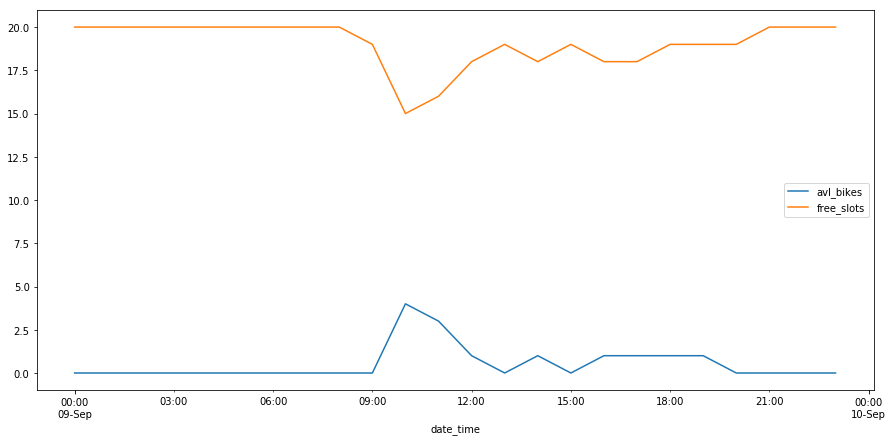

In [25]:
bikes.index = bikes['date_time']
ax = bikes[(bikes['date'] == date(2018,9,9))].plot(y=['avl_bikes','free_slots'], figsize=(15,7))

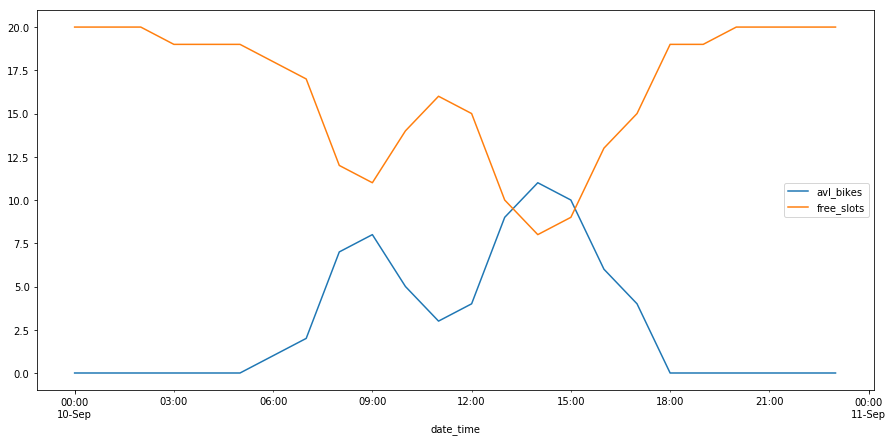

In [26]:
bikes.index = bikes['date_time']
ax = bikes[(bikes['date'] == date(2018,9,10))].plot(y=['avl_bikes','free_slots'], figsize=(15,7))

## Keras

### Data Preparation

In [83]:
bikes.head()

,avl_bikes,date,date_time,free_slots,hour,name,time,total_slots
date_time,,,,,,,,
2018-09-01 00:00:00,7,2018-09-01,2018-09-01 00:00:00,15,0,"539 Aalto-yliopisto (M), Tietotie",00:00:00,20
2018-09-01 01:00:00,7,2018-09-01,2018-09-01 01:00:00,16,1,"539 Aalto-yliopisto (M), Tietotie",01:00:00,20
2018-09-01 02:00:00,6,2018-09-01,2018-09-01 02:00:00,16,2,"539 Aalto-yliopisto (M), Tietotie",02:00:00,20
2018-09-01 03:00:00,5,2018-09-01,2018-09-01 03:00:00,17,3,"539 Aalto-yliopisto (M), Tietotie",03:00:00,20
2018-09-01 04:00:00,5,2018-09-01,2018-09-01 04:00:00,16,4,"539 Aalto-yliopisto (M), Tietotie",04:00:00,20


In [33]:
# Y = zip(list(bikes["avl_bikes"]),list(bikes["free_slots"]))
# print("length Y: %s" % len(Y))

length Y: 1464


In [84]:
result = pd.merge(bikes,data_weather, how='left', left_on=['date_time'], right_on = ['date_time'])
result = result.drop_duplicates("date_time")
result.head()

,avl_bikes,date,date_time,free_slots,hour,name,time,total_slots,Year,m,...,Pressure (msl) (hPa),Relative humidity (%),Precipitation intensity (mm/h),Snow depth (cm),Air temperature (degC),Dew-point temperature (degC),Horizontal visibility (m),Wind direction (deg),Gust speed (m/s),Wind speed (m/s)
0,7,2018-09-01,2018-09-01 00:00:00,15,0,"539 Aalto-yliopisto (M), Tietotie",00:00:00,20,2018,9,...,1021.5,99.0,NaN,NaN,15.1,15.0,18083.0,81.0,3.6,2.1
2,7,2018-09-01,2018-09-01 01:00:00,16,1,"539 Aalto-yliopisto (M), Tietotie",01:00:00,20,2018,9,...,1021.4,100.0,NaN,NaN,14.9,14.9,10570.0,37.0,3.6,1.6
3,6,2018-09-01,2018-09-01 02:00:00,16,2,"539 Aalto-yliopisto (M), Tietotie",02:00:00,20,2018,9,...,1021.3,100.0,NaN,NaN,15.5,15.5,8364.0,69.0,4.0,2.2
4,5,2018-09-01,2018-09-01 03:00:00,17,3,"539 Aalto-yliopisto (M), Tietotie",03:00:00,20,2018,9,...,1021.4,100.0,NaN,NaN,15.7,15.7,8577.0,66.0,3.1,1.5
5,5,2018-09-01,2018-09-01 04:00:00,16,4,"539 Aalto-yliopisto (M), Tietotie",04:00:00,20,2018,9,...,1021.5,99.0,NaN,NaN,16.0,15.9,8891.0,67.0,4.1,2.3


In [98]:

data[0]

{'Air temperature (degC)': 15.1,
 'Cloud amount (1/8)': 7.0,
 'Dew-point temperature (degC)': 15.0,
 'Gust speed (m/s)': 3.6,
 'Horizontal visibility (m)': 18083.0,
 'Precipitation intensity (mm/h)': nan,
 'Pressure (msl) (hPa)': 1021.5,
 'Relative humidity (%)': 99.0,
 'Snow depth (cm)': nan,
 'Time': '00:00',
 'Time zone': 'UTC',
 'Wind direction (deg)': 81.0,
 'Wind speed (m/s)': 2.1,
 'Year': 2018,
 u'avl_bikes': 7,
 'd': 1,
 'date': datetime.date(2018, 9, 1),
 'date_time': Timestamp('2018-09-01 00:00:00'),
 u'free_slots': 15,
 'hour': 0,
 'm': 9,
 u'name': u'539 Aalto-yliopisto (M), Tietotie',
 'time': datetime.time(0, 0),
 u'total_slots': 20}

In [99]:
data = result.to_dict(orient="records")
Y = [i.get("avl_bikes") for i in data]
Y = np.array(Y)
print "Y shape: %s" % str(Y.shape)
X = [(i.get("Air temperature (degC)"),i.get("Relative humidity (%)"),i.get("date_time"),i.get('Pressure (msl) (hPa)')) for i in data]
X = np.array(X)
print "X shape: %s" % str(X.shape)

Y shape: (1464,)
X shape: (1464, 4)


Data Preparation

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

('x_train shape:', (1317, 4))
('x_test shape:', (147, 4))
('y_train shape:', (1317,))
('y_test shape:', (147,))
(1317, 'train sequences')
(147, 'test sequences')


In [102]:
from keras.optimizers import SGD, Adam, RMSprop

batch_size = 512
epochs = 100

optimizer = Adam(lr=1e-2, beta_1=0.9, beta_2=0.999, epsilon=1e-5, decay=0.0)
#optimizer = SGD(lr=1e-4, decay=0.0005, momentum=0.9)
# optimizer = RMSprop(lr=1e-5, rho=0.9, epsilon=1e-08, decay=0.0)

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Build model

In [104]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Activation
from keras.layers import LSTM, GRU, Bidirectional, BatchNormalization

In [115]:
model = Sequential()
model.add(Dense(4, input_shape=(X.shape[1], activation ='tanh')))
model.add(Dense(4))
# model.add(LSTM(3, dropout=0.6, recurrent_dropout=0.6))
# model.add(Embedding(maxfeatures, 3))
# model.add(GRU(3, dropout=0.1, recurrent_dropout=0.3))#0.1,0.3#0.25,0.9
model.add(Activation('softmax'))
# model.add(Embedding(maxfeatures, 16))
# model.add(LSTM(3, dropout=0.7, recurrent_dropout=0.7))
# model.add(Bidirectional(LSTM(128, dropout=0.2,return_sequences=True, recurrent_dropout=0.2)))
# model.add(BatchNormalization())
# model.add(Dense(8, activation ='tanh'))
# model.add(Dropout(0.5))
# model.add(Dense(3, activation='softmax'))
# model.add(Activation('softmax'))

# Compilation
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer ,
              metrics=['accuracy'])

# Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [116]:
from keras.callbacks import EarlyStopping,TensorBoard,ModelCheckpoint
model_name="weatherall"
output_folder="models"
# callbacks
checkpointer = ModelCheckpoint(
    filepath=os.path.join(output_folder, model_name + '.hdf5'),
    monitor='loss', verbose=1, save_best_only=True, mode='min', period=1)

early_stop = EarlyStopping(monitor='loss', min_delta=0.001, patience=5, mode='min', verbose=1)

tensorboard = TensorBoard(log_dir='./Graph/'+model_name, histogram_freq=0,  
          write_graph=True, write_images=True)

In [117]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          callbacks=[checkpointer, early_stop, tensorboard])   

ValueError: Error when checking target: expected activation_2 to have shape (4,) but got array with shape (1,)